In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score


from sklearn.preprocessing import StandardScaler

from tqdm import tqdm


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('..\\datos_3\\df_resultados_sin_out.csv', index_col=0)
df.head()

,price,size_stand,municipality_stand,distance_stand,status_stand,floor_stand,hasLift_stand,propertyType_chalet_stand,propertyType_countryHouse_stand,propertyType_duplex_stand,propertyType_flat_stand,propertyType_penthouse_stand,propertyType_studio_stand,exterior_False_stand,exterior_True_stand,rooms_0_stand,rooms_1_stand,rooms_2_stand,rooms_3_stand,rooms_4_stand,bathrooms_1_stand,bathrooms_2_stand,bathrooms_3_stand
0,750.0,0.011443,0.762605,-0.714088,0.289977,0.480841,0.950489,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,1.384686,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
1,750.0,0.432212,0.310888,-0.040932,0.289977,-0.966375,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
2,590.0,0.432212,-2.056015,2.948728,0.289977,-1.593720,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,-0.754247,2.405922,-0.092582,-2.879145,2.922420,-0.0533
3,684.0,-0.619710,0.762605,-0.446614,-4.112120,-1.593720,-2.389728,-0.092582,-0.0533,-0.203219,-1.909119,-0.170747,2.520747,-0.488463,0.488463,2.490799,-0.722185,-0.754247,-0.415641,-0.092582,0.347325,-0.342182,-0.0533
4,600.0,0.558443,-1.915261,1.505006,0.289977,0.480841,-0.760062,-0.092582,-0.0533,-0.203219,0.523802,-0.170747,-0.396708,-0.488463,0.488463,-0.401478,-0.722185,1.325825,-0.415641,-0.092582,0.347325,-0.342182,-0.0533


In [3]:
x= df.drop(columns='price')
y = df[['price']]

In [4]:
y.describe()

,price
count,334.000000
mean,698.428144
std,52.467744
min,550.000000
25%,670.000000
50%,710.000000
75%,750.000000
max,750.000000


In [5]:
def metricas(y_train, y_train_pred, y_test, y_test_pred):
    metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
    }

    return pd.DataFrame(metricas).T

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=42)

In [8]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(x_train, y_train) # aprendizaje

LinearRegression()

In [9]:
y_train_pred = modelo_lineal.predict(x_train)
y_train_pred[:3]

array([[733.80517578],
       [713.05517578],
       [706.05517578]])

In [10]:
y_test_pred = modelo_lineal.predict(x_test) # predicciones, con xtest porque xtest son sus parametros. ytest son las respuestas con las que comparemos
y_test_pred[:3]

array([[699.55517578],
       [688.05517578],
       [714.37158203]])

In [11]:
y_test = np.array(y_test).ravel()
y_test_pred = np.array(y_test_pred).ravel()

In [12]:
metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,4.031574e-01,3.071502e+01,1.584951e+03,3.981144e+01
test,-1.884288e+23,2.338236e+12,5.522019e+26,2.349898e+13


Text(0, 0.5, 'Predicciones (y_test_pred)')

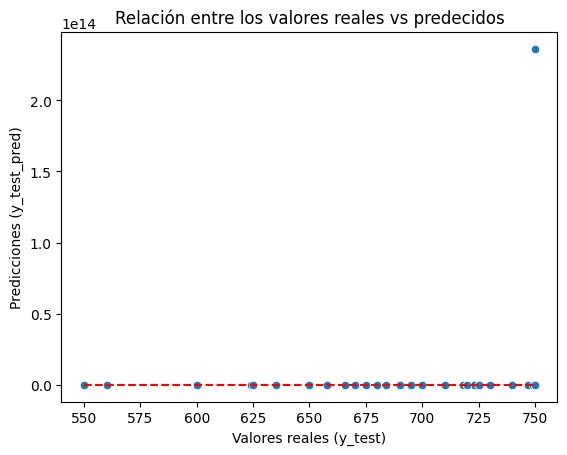

In [13]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x = [min(y_test), max(y_test)], y = [min(y_test), max(y_test)], markersize = 1, color = "red", linestyle = "--")

plt.title('Relación entre los valores reales vs predecidos')
plt.xlabel('Valores reales (y_test)')
plt.ylabel('Predicciones (y_test_pred)')

# Cross Validation

## Decision Tree

In [14]:
params_arbol = {
    'max_depth': [4, 7,10,14],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 15, 20, 30],
    'max_leaf_nodes': [6, 8, 10, 20, 30]
}

In [15]:
params_arbol_4 = {
    'max_depth': [2,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [6,7, 8]
}

In [16]:
params_arbol_3 = {
    'max_depth': [7,10,14],
    'min_samples_split': [10, 30,40],
    'min_samples_leaf': [7, 10],
    'max_leaf_nodes': [7, 8, 9]
}

In [17]:
params_arbol_2 = {
    'max_depth': [5,4,3],
    'min_samples_split': [50, 100, 110],
    'min_samples_leaf': [18,20,21],
    'max_leaf_nodes': [4,5,6,]
}

In [18]:
params_arbol_5 = {
    'max_depth': [10,30,50],
    'min_samples_split': [100, 200, 500],
    'min_samples_leaf': [50,60,81],
    'max_leaf_nodes': [10,20,50]
}

In [19]:
params_arbol_10 = {
    'max_depth': [2,4,7],
    'min_samples_split': [10,20,25],
    'min_samples_leaf': [10, 15,20,25],
    'max_leaf_nodes': [2,4,6,8]
}

## Params 1

In [20]:
grid_search_arbol = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 7, 10, 14],
                         'max_leaf_nodes': [6, 8, 10, 20, 30],
                         'min_samples_leaf': [10, 15, 20, 30],
                         'min_samples_split': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')

In [21]:
modelo_final_arbol = grid_search_arbol.best_estimator_

In [22]:
modelo_final_arbol

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6, min_samples_leaf=20,
                      min_samples_split=50)

In [23]:
y_test_pred_final = modelo_final_arbol.predict(x_test)
y_train_pred_final = modelo_final_arbol.predict(x_train)

In [24]:
df_metricas_arbol = metricas(y_train, y_train_pred_final, y_test, y_test_pred_final)

In [25]:
df_metricas_arbol

,r2_score,MAE,MSE,RMSE
train,0.326044,33.427334,1789.729192,42.305191
test,0.216216,37.745920,2296.926325,47.926259


# Params 3

In [26]:
grid_search_arbol_3 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_3,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 14], 'max_leaf_nodes': [7, 8, 9],
                         'min_samples_leaf': [7, 10],
                         'min_samples_split': [10, 30, 40]},
             scoring='neg_mean_squared_error')

In [27]:
modelo_final_arbol_3 = grid_search_arbol_3.best_estimator_

In [28]:
y_test_pred_final_3 = modelo_final_arbol_3.predict(x_test)
y_train_pred_final_3 = modelo_final_arbol_3.predict(x_train)

In [29]:
df_metricas_arbol_3 = metricas(y_train, y_train_pred_final_3, y_test, y_test_pred_final_3)

In [30]:
df_metricas_arbol_3

,r2_score,MAE,MSE,RMSE
train,0.366078,32.257504,1683.417609,41.029472
test,0.212983,36.980184,2306.400732,48.025001


## PARAMS 2

In [31]:
grid_search_arbol_2 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_2,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 4, 3], 'max_leaf_nodes': [4, 5, 6],
                         'min_samples_leaf': [18, 20, 21],
                         'min_samples_split': [50, 100, 110]},
             scoring='neg_mean_squared_error')

In [32]:
modelo_final_arbol_2 = grid_search_arbol_2.best_estimator_

In [33]:
modelo_final_arbol_2

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=6, min_samples_leaf=20,
                      min_samples_split=50)

In [34]:
y_test_pred_final_2 = modelo_final_arbol_2.predict(x_test)
y_train_pred_final_2 = modelo_final_arbol_2.predict(x_train)

In [35]:
df_metricas_arbol_2 = metricas(y_train, y_train_pred_final_2, y_test, y_test_pred_final_2)

In [36]:
df_metricas_arbol_2

,r2_score,MAE,MSE,RMSE
train,0.326044,33.427334,1789.729192,42.305191
test,0.216216,37.745920,2296.926325,47.926259


# Params 5

In [37]:
grid_search_arbol_5 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_5,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_5.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50],
                         'max_leaf_nodes': [10, 20, 50],
                         'min_samples_leaf': [50, 60, 81],
                         'min_samples_split': [100, 200, 500]},
             scoring='neg_mean_squared_error')

In [38]:
modelo_final_arbol_5 = grid_search_arbol_5.best_estimator_

In [39]:
modelo_final_arbol_5

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, min_samples_leaf=50,
                      min_samples_split=100)

In [40]:
y_test_pred_final_5 = modelo_final_arbol_5.predict(x_test)
y_train_pred_final_5 = modelo_final_arbol_5.predict(x_train)

In [41]:
df_metricas_arbol_5 = metricas(y_train, y_train_pred_final_5, y_test, y_test_pred_final_5)

In [42]:
df_metricas_arbol_5

,r2_score,MAE,MSE,RMSE
train,0.220524,36.117577,2069.944879,45.496647
test,0.214026,37.235122,2303.344332,47.993170


# PARAMS 10

In [43]:
grid_search_arbol_10 = GridSearchCV(DecisionTreeRegressor(),
                                 param_grid=params_arbol_10,
                                 cv = 5,
                                 scoring= 'neg_mean_squared_error',
                                 n_jobs=-1)
grid_search_arbol_10.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 7], 'max_leaf_nodes': [2, 4, 6, 8],
                         'min_samples_leaf': [10, 15, 20, 25],
                         'min_samples_split': [10, 20, 25]},
             scoring='neg_mean_squared_error')

In [44]:
modelo_final_arbol_10 = grid_search_arbol_10.best_estimator_

In [45]:
modelo_final_arbol_10

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=6, min_samples_leaf=25,
                      min_samples_split=10)

In [46]:
y_test_pred_final_10 = modelo_final_arbol_10.predict(x_test)
y_train_pred_final_10 = modelo_final_arbol_10.predict(x_train)

In [47]:
df_metricas_arbol_10 = metricas(y_train, y_train_pred_final_10, y_test, y_test_pred_final_10)

In [48]:
df_metricas_arbol_10

,r2_score,MAE,MSE,RMSE
train,0.302373,33.675262,1852.588832,43.041710
test,0.323546,34.461309,1982.388759,44.524025


## Opciones de visualización para mejorar

In [49]:
df_resultados_arbol = pd.DataFrame(grid_search_arbol_5.cv_results_).sort_values(by = 'rank_test_score', ascending=True)
df_resultados_arbol.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006171,0.000466,0.005045,0.000909,10,10,50,100,"{'max_depth': 10, 'max_leaf_nodes': 10, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
45,0.007543,0.001329,0.006138,0.000782,30,50,50,100,"{'max_depth': 30, 'max_leaf_nodes': 50, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
36,0.007732,0.001759,0.005641,0.000844,30,20,50,100,"{'max_depth': 30, 'max_leaf_nodes': 20, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
54,0.007102,0.000610,0.009222,0.002341,50,10,50,100,"{'max_depth': 50, 'max_leaf_nodes': 10, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
27,0.007681,0.001059,0.006257,0.000417,30,10,50,100,"{'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
72,0.011575,0.002565,0.020745,0.016387,50,50,50,100,"{'max_depth': 50, 'max_leaf_nodes': 50, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
9,0.008280,0.000718,0.005932,0.000667,10,20,50,100,"{'max_depth': 10, 'max_leaf_nodes': 20, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
18,0.009199,0.001531,0.007611,0.002142,10,50,50,100,"{'max_depth': 10, 'max_leaf_nodes': 50, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
63,0.008640,0.001947,0.007996,0.001874,50,20,50,100,"{'max_depth': 50, 'max_leaf_nodes': 20, 'min_s...",-2237.915872,-1733.602489,-2832.176273,-2791.908761,-3377.448489,-2594.610377,561.563045,1
33,0.016509,0.016547,0.006571,0.001342,30,10,81,100,"{'max_depth': 30, 'max_leaf_nodes': 10, 'min_s...",-2390.772712,-1893.230035,-2478.001670,-2586.352039,-3736.784760,-2617.028243,608.144635,10


In [50]:
df_resultados_arbol_filtrado = df_resultados_arbol.filter(like='param').drop(columns='params')
df_resultados_arbol_filtrado['MSE'] = df_resultados_arbol['mean_test_score']
df_resultados_arbol_filtrado

,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,MSE
0,10,10,50,100,-2594.610377
45,30,50,50,100,-2594.610377
36,30,20,50,100,-2594.610377
54,50,10,50,100,-2594.610377
27,30,10,50,100,-2594.610377
...,...,...,...,...,...
3,10,10,60,100,-2702.789912
57,50,10,60,100,-2702.789912
39,30,20,60,100,-2702.789912
30,30,10,60,100,-2702.789912


In [51]:
df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby('param_max_depth')['MSE'].mean().abs()).reset_index()

In [52]:
df_rmse_prof

,param_max_depth,MSE
0,10,51.70004
1,30,51.70004
2,50,51.70004


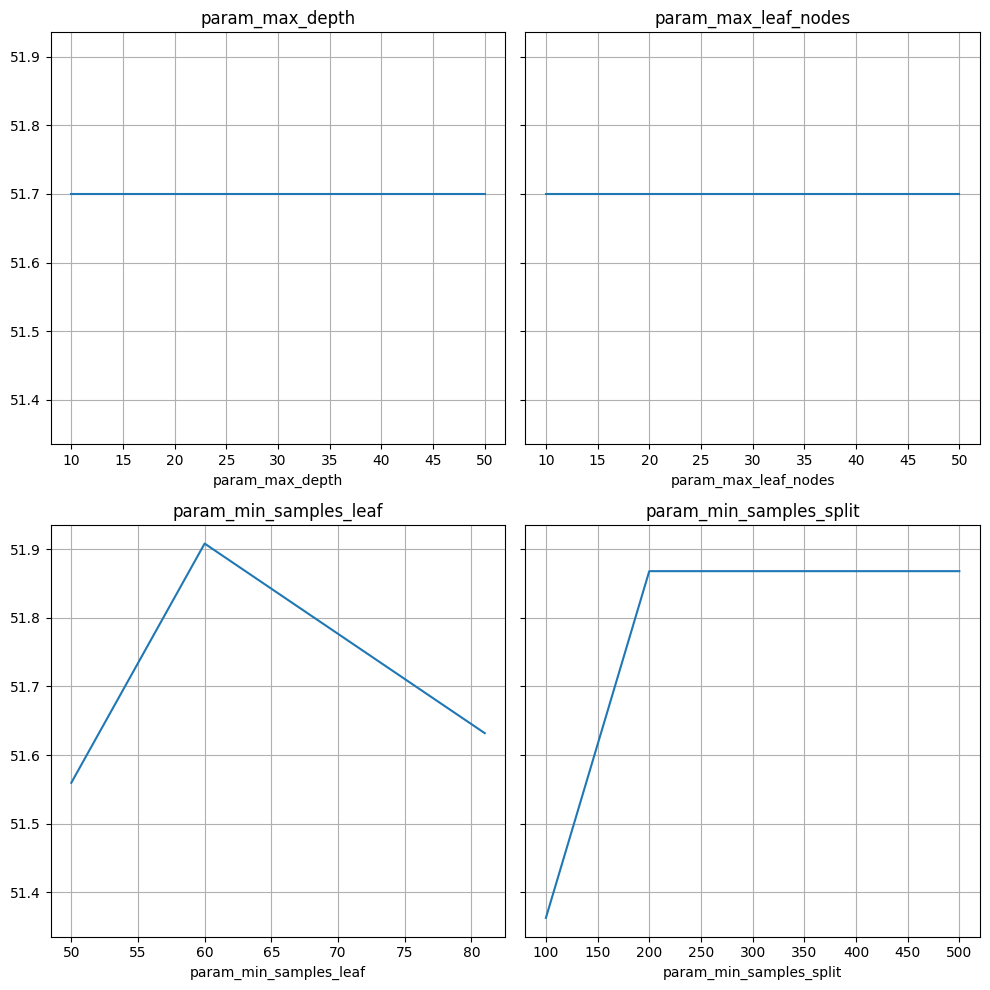

In [53]:
# df_rmse_prof = np.sqrt(df_resultados_arbol_filtrado.groupby("param_max_depth")["MSE"].mean().abs())
# df_rmse_prof = pd.DataFrame(df_rmse_prof).reset_index()

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10), sharey=True)
axes = axes.flat

for indice, column in enumerate(df_resultados_arbol_filtrado.columns[:-1]):
    # Asegurarse de no exceder el número de subgráficos
    if indice >= len(axes):
        break

    df_rmse_col = np.sqrt(df_resultados_arbol_filtrado.groupby(column)["MSE"].mean().abs())

    sns.lineplot(x=df_rmse_col.index, y=df_rmse_col.values, ax=axes[indice])
    axes[indice].grid()
    axes[indice].set_title(column)

plt.tight_layout()
plt.show() 

In [54]:
df_importancia = pd.DataFrame(modelo_final_arbol.feature_importances_,columns = ['Importancia'], index=x.columns).sort_values(by='Importancia', ascending=False)

<Axes: xlabel='Importancia', ylabel='None'>

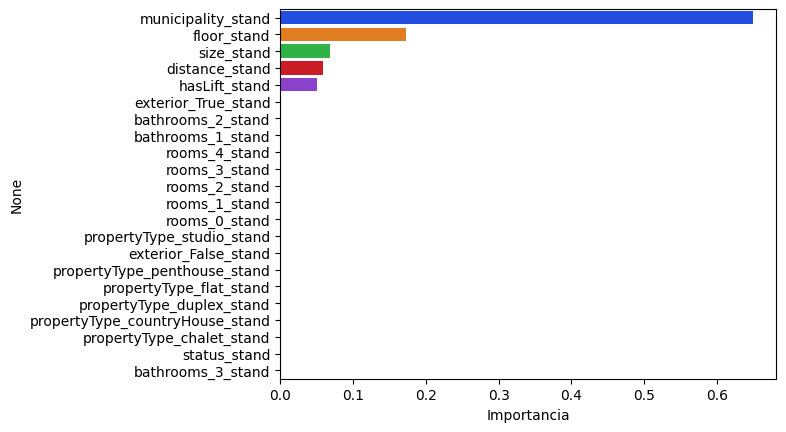

In [55]:
sns.barplot(x='Importancia', y=df_importancia.index ,data=df_importancia, palette='bright')

# Random Forest

In [56]:
params_rrf = {
    'n_estimators': [100, 250, 500,1000],
    'max_features': [2,4,8,12,16],
    'max_depth': [10],
    'min_samples_split': [9,15,35],
    'min_samples_leaf': [40,60,80,100,200], 
    # 'max_leaf_nodes': [55]
}

modelo_rrf = RandomForestRegressor(random_state=42, bootstrap=True,n_jobs=-1) # por este método nos pide un array

randonmized_rrf = RandomizedSearchCV(modelo_rrf, # solo hace las iteraciones que le digo
                              params_rrf,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              random_state=50, #semilla
                              n_iter=10,
                              verbose=10)

randonmized_rrf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rrf = randonmized_rrf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [57]:
modelo_final_rrf

RandomForestRegressor(max_depth=10, max_features=8, min_samples_leaf=60,
                      min_samples_split=9, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [58]:
y_pred_test_rrf = modelo_final_rrf.predict(x_test)
y_pred_train_rrf = modelo_final_rrf.predict(x_train)
df_metricas_rrf = metricas(y_train, y_pred_train_rrf, y_test, y_pred_test_rrf)
df_metricas_rrf

,r2_score,MAE,MSE,RMSE
train,0.086716,40.199048,2425.278453,49.247116
test,0.027416,41.588841,2850.216452,53.387418


In [59]:
params_rf = {
    'n_estimators': [35,50,75,115,110,120,150],
    'max_features': [3,5,7,10,15,18,20],
    'max_depth': [1,2,3,5,7,9],
    'min_samples_split': [50,60,65],
    'min_samples_leaf': [19,21], 
    'max_leaf_nodes': [2,4,6]
}

modelo_rf = RandomForestRegressor(random_state=42, bootstrap=True) # por este método nos pide un array

grid_search_rf = GridSearchCV(modelo_rf,
                              params_rf,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1,
                              )

grid_search_rf.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_rf = grid_search_rf.best_estimator_

In [60]:
modelo_final_rf

RandomForestRegressor(max_depth=3, max_features=15, max_leaf_nodes=4,
                      min_samples_leaf=19, min_samples_split=60,
                      n_estimators=50, random_state=42)

In [61]:
y_pred_test_rf = modelo_final_rf.predict(x_test)
y_pred_train_rf = modelo_final_rf.predict(x_train)
df_metricas_rf = metricas(y_train, y_pred_train_rf, y_test, y_pred_test_rf)
df_metricas_rf

,r2_score,MAE,MSE,RMSE
train,0.313515,33.201306,1823.002106,42.696629
test,0.294849,35.508680,2066.486752,45.458627


# Gradient Booster

In [62]:
# Definimos un espacio de parámetros para optimizar
params_gb = {
    'n_estimators': [115,150,200],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3],
    'min_samples_split': [100],
    'min_samples_leaf': [20], 
}

modelo_gb = GradientBoostingRegressor(random_state=42) # por este método nos pide un array

grid_search_gb = GridSearchCV(modelo_gb,
                              params_gb,
                              cv = 5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_gb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_gb = grid_search_gb.best_estimator_

In [63]:
modelo_final_gb

GradientBoostingRegressor(min_samples_leaf=20, min_samples_split=100,
                          n_estimators=115, random_state=42)

In [64]:
y_pred_test_gb = modelo_final_gb.predict(x_test)
y_pred_train_gb = modelo_final_gb.predict(x_train)
df_metricas_gb = metricas(y_train, y_pred_train_gb, y_test, y_pred_test_gb)
df_metricas_gb

,r2_score,MAE,MSE,RMSE
train,0.566017,26.178933,1152.468295,33.948023
test,0.275411,34.429561,2123.453009,46.080940


# XGB

In [65]:
from xgboost import XGBRegressor

In [66]:
params_xgb = {
    'n_estimators': [70],
    'learning_rate': [0.01, 0.05,0.1],
    'max_depth': [3],
    'min_child_weight': [6,7],
    'subsample': [0.8], 
    'colsample_bytree': [0.25]
}

modelo_xgb = XGBRegressor(random_state=42) # por este método nos pide un array

grid_search_xgb = GridSearchCV(modelo_xgb,
                              params_xgb,
                              cv = 3,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)

grid_search_xgb.fit(x_train, y_train['price'].values) # array de una dim
modelo_final_xgb = grid_search_xgb.best_estimator_

In [67]:
modelo_final_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.25, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [68]:
y_pred_test_xgb = modelo_final_xgb.predict(x_test)
y_pred_train_xgb = modelo_final_xgb.predict(x_train)
df_metricas_xgb = metricas(y_train, y_pred_train_xgb, y_test, y_pred_test_xgb)
df_metricas_xgb

,r2_score,MAE,MSE,RMSE
train,0.563232,26.833904,1159.861805,34.056744
test,0.282588,33.758908,2102.419579,45.852149
